In [1]:
# importing libraries
import pandas as pd # Reading csv file 
from shapely.geometry import Point # Shapely for converting latitude/longtitude to geometry
import geopandas as gpd # To create GeodataFrame

In [2]:
os.getcwd()

'/Users/sarwaridas/Desktop/IDS 702/Final Project/ids720_CoffeeAndCrimes/01_datawrangling'

## Creating point location

In [3]:
os.chdir('/Users/sarwaridas/Desktop/IDS 702/Final Project/ids720_CoffeeAndCrimes/00_sourcedata')
df= pd.read_csv("CoffeeShops_byLatitude.csv")
df.head()

,Unnamed: 0,names_doingbusiness,keep_row,ID,LATITUDE,LONGITUDE,LOCATION,year
0,201,arturo express,1,53931-20200916,41.879616,-87.639765,"(41.87961626801739, -87.63976452343368)",2020.0
1,840,social junkie,1,2551384-20171214,41.950348,-87.807329,"(41.95034769269968, -87.80732944580947)",2017.0
2,1223,social junkie,1,2551384-20191216,41.950348,-87.807329,"(41.95034769269968, -87.80732944580947)",2019.0
3,2027,lutz continental cafe & pastry shop,1,1356917-20201216,41.961409,-87.690796,"(41.96140869447139, -87.6907962429884)",2020.0
4,2251,gaslight coffee roasters,1,2185009-20201016,41.924668,-87.699992,"(41.92466824748827, -87.69999236109766)",2020.0


In [4]:
geometry = [Point(xy) for xy in zip(df['LONGITUDE'],df['LATITUDE'])]
# Coordinate reference system : WGS84
crs = {'init': 'EPSG:4326'}

# Creating a Geographic data frame 
gdf = gpd.GeoDataFrame(df, crs=crs, geometry=geometry)
gdf= gdf.set_crs("EPSG:4326",allow_override=True)


/Users/sarwaridas/opt/miniconda3/envs/geo/lib/python3.9/site-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [5]:
gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [6]:
gdf.loc[gdf['names_doingbusiness']=="hegewisch nutrition"]

,Unnamed: 0,names_doingbusiness,keep_row,ID,LATITUDE,LONGITUDE,LOCATION,year,geometry
12988,929773,hegewisch nutrition,1,2738264-20200707,41.648743,-87.546082,"(41.648742509014895, -87.54608218874857)",2020.0,POINT (-87.54608 41.64874)


## Mapping point to community area

In [7]:
boundaries= gpd.read_file("/Users/sarwaridas/Desktop/IDS 702/Final Project/ids720_CoffeeAndCrimes/00_sourcedata/Boundaries/geo_export_5bdaf3fc-172d-4e90-b507-028e2a2f0c83.dbf")
boundaries.head()

,area,area_num_1,area_numbe,comarea,comarea_id,community,perimeter,shape_area,shape_len,geometry
0,0.0,35,35,0.0,0.0,DOUGLAS,0.0,4.600462e+07,31027.054510,"POLYGON ((-87.60914 41.84469, -87.60915 41.844..."
1,0.0,36,36,0.0,0.0,OAKLAND,0.0,1.691396e+07,19565.506153,"POLYGON ((-87.59215 41.81693, -87.59231 41.816..."
2,0.0,37,37,0.0,0.0,FULLER PARK,0.0,1.991670e+07,25339.089750,"POLYGON ((-87.62880 41.80189, -87.62879 41.801..."
3,0.0,38,38,0.0,0.0,GRAND BOULEVARD,0.0,4.849250e+07,28196.837157,"POLYGON ((-87.60671 41.81681, -87.60670 41.816..."
4,0.0,39,39,0.0,0.0,KENWOOD,0.0,2.907174e+07,23325.167906,"POLYGON ((-87.59215 41.81693, -87.59215 41.816..."


In [8]:
distance_to_cca = gdf.sjoin(boundaries, how="left", predicate='intersects')
distance_to_cca.sample(10)

,Unnamed: 0,names_doingbusiness,keep_row,ID,LATITUDE,LONGITUDE,LOCATION,year,geometry,index_right,area,area_num_1,area_numbe,comarea,comarea_id,community,perimeter,shape_area,shape_len
1246,145095,cafe l'appetito,1,2555547-20190916,41.894903,-87.620744,"(41.89490330235543, -87.62074372623964)",2019.0,POINT (-87.62074 41.89490),36.0,0.0,8,8,0.0,0.0,NEAR NORTH SIDE,0.0,7.667590e+07,57293.164952
11356,817667,borders book music movie cafe,1,1474659-20040816,41.910813,-87.648010,"(41.91081347276207, -87.64801045147456)",2004.0,POINT (-87.64801 41.91081),36.0,0.0,8,8,0.0,0.0,NEAR NORTH SIDE,0.0,7.667590e+07,57293.164952
11172,805914,yoshi's cafe,1,2109174-20140701,41.941696,-87.649177,"(41.94169634075317, -87.64917656601214)",2014.0,POINT (-87.64918 41.94170),44.0,0.0,6,6,0.0,0.0,LAKE VIEW,0.0,8.721480e+07,51973.096868
10209,740393,rosebud cafe,1,25694-20020516,41.869409,-87.664197,"(41.86940905403705, -87.66419709016535)",2002.0,POINT (-87.66420 41.86941),28.0,0.0,28,28,0.0,0.0,NEAR WEST SIDE,0.0,1.584925e+08,53003.592941
6840,518321,cafe allure,1,66159-20030516,41.908620,-87.649295,"(41.90861972732258, -87.64929457094323)",2003.0,POINT (-87.64929 41.90862),36.0,0.0,8,8,0.0,0.0,NEAR NORTH SIDE,0.0,7.667590e+07,57293.164952
14714,1020839,d train food mart inc.,1,2569667-20180205,41.780162,-87.613805,"(41.78016157649594, -87.61380513050851)",2018.0,POINT (-87.61381 41.78016),8.0,0.0,42,42,0.0,0.0,WOODLAWN,0.0,5.781518e+07,46936.959244
15012,1030001,shraddha wine and spirit,1,2694595-20191223,42.004464,-87.672654,"(42.00446420936195, -87.67265395425996)",2019.0,POINT (-87.67265 42.00446),9.0,0.0,1,1,0.0,0.0,ROGERS PARK,0.0,5.125990e+07,34052.397576
14969,1028630,"67th st market, inc.",1,2617225-20201016,41.772304,-87.663879,"(41.77230412982461, -87.66387864736951)",2020.0,POINT (-87.66388 41.77230),64.0,0.0,67,67,0.0,0.0,WEST ENGLEWOOD,0.0,8.794769e+07,40195.203307
5015,394106,manny's cafe midway,1,1198021-20120116,41.789329,-87.741646,"(41.789329323265385, -87.74164564419637)",2012.0,POINT (-87.74165 41.78933),54.0,0.0,56,56,0.0,0.0,GARFIELD RIDGE,0.0,1.178908e+08,60080.447970
14731,1021302,7-eleven # 33779 c,1,2446652-20180616,41.961343,-87.700973,"(41.961343153284, -87.70097298218666)",2018.0,POINT (-87.70097 41.96134),13.0,0.0,14,14,0.0,0.0,ALBANY PARK,0.0,5.354223e+07,39339.016439


In [47]:
# distance_to_cca=gdf.sjoin_nearest(boundaries[['geometry','community']], distance_col="distance")
# distance_to_cca.head() 

In [9]:
distance_to_cca.community.unique()

array(['NEAR WEST SIDE', 'DUNNING', 'LINCOLN SQUARE', 'LOGAN SQUARE',
       'NEAR NORTH SIDE', 'EAST GARFIELD PARK', 'BEVERLY',
       'WEST GARFIELD PARK', 'WEST TOWN', 'NORTH PARK', 'LINCOLN PARK',
       'CHICAGO LAWN', 'AUSTIN', 'UPTOWN', 'ALBANY PARK', 'AVONDALE',
       'HUMBOLDT PARK', 'LAKE VIEW', 'HYDE PARK', 'CLEARING',
       'BRIGHTON PARK', 'EDGEWATER', 'GRAND BOULEVARD', 'BELMONT CRAGIN',
       'SOUTH LAWNDALE', 'LOOP', 'GREATER GRAND CROSSING', 'IRVING PARK',
       'LOWER WEST SIDE', 'WOODLAWN', 'NEW CITY', 'PULLMAN', nan,
       'EAST SIDE', 'NEAR SOUTH SIDE', 'MONTCLARE', 'PORTAGE PARK',
       'AUBURN GRESHAM', 'GARFIELD RIDGE', 'FOREST GLEN', 'ARMOUR SQUARE',
       'ROGERS PARK', 'WEST ELSDON', 'CHATHAM', 'ROSELAND', 'BRIDGEPORT',
       'NORWOOD PARK', 'SOUTH SHORE', 'NORTH CENTER', 'KENWOOD',
       'WEST ENGLEWOOD', 'WEST RIDGE', 'ENGLEWOOD', 'HERMOSA',
       'MORGAN PARK', 'NORTH LAWNDALE', 'JEFFERSON PARK', 'AVALON PARK',
       'EDISON PARK', 'MOUNT GREENW

In [10]:
coffee_by_year_CCA_revised=distance_to_cca[['community','year','keep_row']].groupby(['community','year'],as_index=False).sum()
coffee_by_year_CCA_revised.head()

,community,year,keep_row
0,ALBANY PARK,2002.0,11
1,ALBANY PARK,2003.0,12
2,ALBANY PARK,2004.0,17
3,ALBANY PARK,2005.0,21
4,ALBANY PARK,2006.0,20


In [11]:
os.chdir('/Users/sarwaridas/Desktop/IDS 702/Final Project/ids720_CoffeeAndCrimes/02_processed_data')
coffee_by_year_CCA_revised.to_csv("coffee_by_year_CCA_revised.csv")


In [12]:
coffee_by_year_CCA_revised.shape

(1209, 3)

In [13]:
coffee_by_year_CCA_revised.nunique()

community    75
year         21
keep_row     95
dtype: int64

In [14]:
coffee_by_year_CCA_revised1= coffee_by_year_CCA_revised.loc[coffee_by_year_CCA_revised.year>2004]
coffee_by_year_CCA_revised1=coffee_by_year_CCA_revised1.loc[coffee_by_year_CCA_revised1.year<2020]
coffee_by_year_CCA_revised1.shape

(864, 3)

In [15]:
coffee_by_year_CCA_revised1.nunique()

community    75
year         15
keep_row     84
dtype: int64

## Making plots!

In [16]:
data= pd.read_csv("/Users/sarwaridas/Desktop/IDS 702/Final Project/ids720_CoffeeAndCrimes/02_processed_data/coffee_crime_controls_revised.csv",index_col=['Unnamed: 0'])
data.GEOG=data.GEOG.apply(lambda x: x.upper())

crimes=data[['GEOG','crimes','TOT_POP']].groupby('GEOG',as_index=False).sum()
coffeeshops=data[['GEOG','coffeeshops','TOT_POP']].groupby('GEOG',as_index=False).sum()
WhitePerc=data[['GEOG','WhitePerc']].groupby('GEOG',as_index=False).mean()
WhitePerc1=data[['GEOG','WHITE']].groupby('GEOG',as_index=False).sum()

#boundaries.plot()


In [17]:
data.columns

Index(['timeperiod', 'GEOG', 'crimes', 'coffeeshops', 'INC_LT_25K',
       'INC_25_50K', 'INC_50_75K', 'INC_75_100K', 'INC_100_150K', 'INC_GT_150',
       'MEDINC', 'HS', 'BACH', 'EMP', 'UNEMP', 'TOT_POP', 'WHITE', 'HISP',
       'BLACK', 'ASIAN', 'MED_AGE', 'POP_HH', 'AsianPerc', 'BlackPerc',
       'HispPerc', 'WhitePerc', 'UnemployedPerc', 'EmployedPerc', 'Inc25k',
       'Inc50k', 'Inc75k', 'Inc100k', 'Inc150k', 'Inc_gt150k', 'HSperc',
       'BACHperc'],
      dtype='object')

In [18]:
merged_crimes= gpd.GeoDataFrame(pd.merge(crimes,boundaries,left_on='GEOG',right_on='community',validate="1:1"))
merged_coffee= gpd.GeoDataFrame(pd.merge(coffeeshops,boundaries,left_on='GEOG',right_on='community',validate="1:1"))
merged_wc= gpd.GeoDataFrame(pd.merge(WhitePerc,boundaries,left_on='GEOG',right_on='community',validate="1:1"))
merged_wc1= gpd.GeoDataFrame(pd.merge(WhitePerc1,boundaries,left_on='GEOG',right_on='community',validate="1:1"))


In [19]:
merged_wc.head()

,GEOG,WhitePerc,area,area_num_1,area_numbe,comarea,comarea_id,community,perimeter,shape_area,shape_len,geometry
0,ALBANY PARK,0.302455,0.0,14,14,0.0,0.0,ALBANY PARK,0.0,5.354223e+07,39339.016439,"POLYGON ((-87.70404 41.97355, -87.70403 41.973..."
1,ARCHER HEIGHTS,0.194455,0.0,57,57,0.0,0.0,ARCHER HEIGHTS,0.0,5.592251e+07,31880.021029,"POLYGON ((-87.71437 41.82604, -87.71436 41.825..."
2,ARMOUR SQUARE,0.123494,0.0,34,34,0.0,0.0,ARMOUR SQUARE,0.0,2.776620e+07,31948.598840,"POLYGON ((-87.62917 41.84556, -87.62947 41.845..."
3,ASHBURN,0.135841,0.0,70,70,0.0,0.0,ASHBURN,0.0,1.354603e+08,54818.154632,"POLYGON ((-87.71255 41.75734, -87.71252 41.757..."
4,AUBURN GRESHAM,0.005936,0.0,71,71,0.0,0.0,AUBURN GRESHAM,0.0,1.050654e+08,46757.721716,"POLYGON ((-87.63990 41.75615, -87.63990 41.755..."


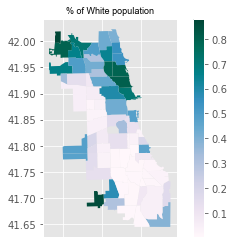

In [33]:
 # Plot by GDP per capita

import os
os.chdir("/Users/sarwaridas/Desktop/IDS 702/Final Project/ids720_CoffeeAndCrimes/03_analysis/")


import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.style.use('ggplot')

font = {'family': 'Arial',
        'color':  'black',
        'weight': 'normal',
        'size': 9,
        }

merged_wc.plot(column='WhitePerc',cmap='PuBuGn',legend=True)
mpl.pyplot.title("% of White population", fontdict=font, loc='center', pad=None)
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off

In [32]:
# merged_wc1.plot(column='WHITE',cmap='PuBuGn',legend=True)
# mpl.pyplot.title("% of White population", fontdict=font, loc='center', pad=None)
# plt.tick_params(
#     axis='x',          # changes apply to the x-axis
#     which='both',      # both major and minor ticks are affected
#     bottom=False,      # ticks along the bottom edge are off
#     top=False,         # ticks along the top edge are off
#     labelbottom=False) # labels along the bottom edge are off

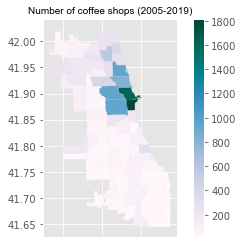

In [29]:

font = {'family': 'Arial',
        'color':  'black',
        'weight': 'normal',
        'size': 10,
        }
merged_coffee.plot(column='coffeeshops',cmap='PuBuGn',legend=True)
mpl.pyplot.title("Number of coffee shops (2005-2019)", fontdict=font, loc='center', pad=None)
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off



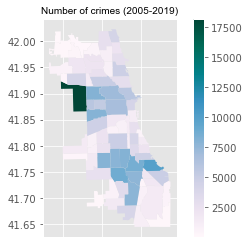

In [30]:
merged_crimes['rate']= merged_crimes.crimes/merged_crimes.TOT_POP
merged_crimes.plot(column='crimes',cmap='PuBuGn',legend=True)
mpl.pyplot.title("Number of crimes (2005-2019)", fontdict=font, loc='center', pad=None)
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off

In [108]:
# merged_crimes.plot(column='rate',cmap='PuBu',scheme='quantiles',legend=True)
# mpl.pyplot.title("Number of crimes (2005-2019)", fontdict=font, loc='center', pad=None)
# plt.tick_params(
#     axis='x',          # changes apply to the x-axis
#     which='both',      # both major and minor ticks are affected
#     bottom=False,      # ticks along the bottom edge are off
#     top=False,         # ticks along the top edge are off
#     labelbottom=False) # labels along the bottom edge are off